In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import re

random.seed(8)

read_file = "parking-citations.csv"
#new_data = read_file.dropna(axis = 0, how ='any')
n = sum(1 for line in open(read_file)) - 1
s = 5000
skip = sorted(random.sample(range(1, n+1), n-s))
file_df = pd.read_csv(read_file, skiprows=skip)
file_df.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,4273974670,2015-12-30T00:00:00,1438.0,SC148,NaN,CA,201605.0,NaN,HOND,PA,WT,12444 VENTURA BL,00358,53.0,88.13B+,METER EXP.,63.0,6439426.1,1874748.1
1,4274528230,2015-12-30T00:00:00,1145.0,WS5614,NaN,CA,201604.0,NaN,AUDI,PA,BK,10984 SANTA MONICA BLVD W,00183,51.0,88.13B+,METER EXP.,63.0,99999.0,99999.0
2,4274546894,2015-12-30T00:00:00,911.0,NaN,NaN,CA,201612.0,NaN,FORD,PA,BK,18047 MARTHA ST,00365,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,99999.0,99999.0
3,4273069861,2015-12-31T00:00:00,1021.0,NaN,NaN,CA,201608.0,NaN,CHRY,PA,BK,6201 HOLLYWOOD BLVD,00483,54.0,80.56E4+,RED ZONE,93.0,6463435.6,1859528.0
4,4273336513,2015-12-31T00:00:00,1119.0,NaN,NaN,CA,4.0,NaN,CHEV,PA,WT,4187 ARCH DR,00395,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,6448933.9,1874519.1


In [ ]:
#holding code
#n = sum(1 for line in open(read_file)) - 1
#s = 5000
#skip = sorted(random.sample(range(1, n+1), n-s))
#file_df = pd.read_csv(read_file, skiprows=skip)
#file_df.head()

In [2]:
#DataFrame created from original information
hwdf = file_df.drop(columns = ["Ticket number", "Meter Id", "Marked Time", "Plate Expiry Date", "VIN", "Route",
                               "Agency", "Violation code"])
hwdf.head()

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude
0,2015-12-30T00:00:00,1438.0,CA,HOND,PA,WT,12444 VENTURA BL,METER EXP.,63.0,6439426.1,1874748.1
1,2015-12-30T00:00:00,1145.0,CA,AUDI,PA,BK,10984 SANTA MONICA BLVD W,METER EXP.,63.0,99999.0,99999.0
2,2015-12-30T00:00:00,911.0,CA,FORD,PA,BK,18047 MARTHA ST,NO PARK/STREET CLEAN,73.0,99999.0,99999.0
3,2015-12-31T00:00:00,1021.0,CA,CHRY,PA,BK,6201 HOLLYWOOD BLVD,RED ZONE,93.0,6463435.6,1859528.0
4,2015-12-31T00:00:00,1119.0,CA,CHEV,PA,WT,4187 ARCH DR,NO PARK/STREET CLEAN,73.0,6448933.9,1874519.1


In [3]:
new_data = hwdf.dropna(axis = 0, how ='any')
new_data.head()

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude
0,2015-12-30T00:00:00,1438.0,CA,HOND,PA,WT,12444 VENTURA BL,METER EXP.,63.0,6439426.1,1874748.1
1,2015-12-30T00:00:00,1145.0,CA,AUDI,PA,BK,10984 SANTA MONICA BLVD W,METER EXP.,63.0,99999.0,99999.0
2,2015-12-30T00:00:00,911.0,CA,FORD,PA,BK,18047 MARTHA ST,NO PARK/STREET CLEAN,73.0,99999.0,99999.0
3,2015-12-31T00:00:00,1021.0,CA,CHRY,PA,BK,6201 HOLLYWOOD BLVD,RED ZONE,93.0,6463435.6,1859528.0
4,2015-12-31T00:00:00,1119.0,CA,CHEV,PA,WT,4187 ARCH DR,NO PARK/STREET CLEAN,73.0,6448933.9,1874519.1


In [4]:
new_data.count()

Issue Date               4979
Issue time               4979
RP State Plate           4979
Make                     4979
Body Style               4979
Color                    4979
Location                 4979
Violation Description    4979
Fine amount              4979
Latitude                 4979
Longitude                4979
dtype: int64

In [7]:
#with the help of Sean and python library "re"
datetimelist = []  
year = []
month = []
day = []

yearmonth = []
for item in new_data['Issue Date']:
    #legacy method
    #d1 = datetime.datetime.strptime(str(item),"%Y-%m-%dT%H:%M:%S")
    
    #different method
    d2 = re.split("T",str(item))
    splittedData = re.split("-",str(d2[0]))
    year.append(splittedData[0])
    month.append(splittedData[1])
    day.append(splittedData[2])
    yearmonth.append(splittedData[0] + splittedData[1])
    datetimelist.append(d2[0])
new_data['Date'] = datetimelist
new_data["Year"] = year
new_data["month"] = month
new_data["day"] = day
new_data["yearmonth"] = yearmonth

new_data.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude,Date,Year,month,day,yearmonth
0,2015-12-30T00:00:00,1438.0,CA,HOND,PA,WT,12444 VENTURA BL,METER EXP.,63.0,6439426.1,1874748.1,2015-12-30,2015,12,30,201512
1,2015-12-30T00:00:00,1145.0,CA,AUDI,PA,BK,10984 SANTA MONICA BLVD W,METER EXP.,63.0,99999.0,99999.0,2015-12-30,2015,12,30,201512
2,2015-12-30T00:00:00,911.0,CA,FORD,PA,BK,18047 MARTHA ST,NO PARK/STREET CLEAN,73.0,99999.0,99999.0,2015-12-30,2015,12,30,201512
3,2015-12-31T00:00:00,1021.0,CA,CHRY,PA,BK,6201 HOLLYWOOD BLVD,RED ZONE,93.0,6463435.6,1859528.0,2015-12-31,2015,12,31,201512
4,2015-12-31T00:00:00,1119.0,CA,CHEV,PA,WT,4187 ARCH DR,NO PARK/STREET CLEAN,73.0,6448933.9,1874519.1,2015-12-31,2015,12,31,201512


In [9]:
#new_data['yearmonth'].count()

In [15]:
#mth_count = new_data["yearmonth"].value_counts()
#mth_count

In [8]:
sorted_df = new_data.sort_values(by=["yearmonth"],ascending=True)
sorted_df.head(10)

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude,Date,Year,month,day,yearmonth
629,2014-10-31T00:00:00,2309.0,CA,CHEV,PA,WT,1067 SANBORN AVE N,PREFERENTIAL PARKING,68.0,6476633.1,1855876.4,2014-10-31,2014,10,31,201410
636,2014-10-31T00:00:00,1214.0,CA,TOYT,PA,RD,1016 PARK VIEW ST S,NO PARK/STREET CLEAN,73.0,6475887.6,1841756.2,2014-10-31,2014,10,31,201410
637,2014-11-03T00:00:00,1022.0,NV,TOYT,PA,BK,22028 COVELLO ST,NO PARK/STREET CLEAN,73.0,6378267.3,1898407.7,2014-11-03,2014,11,03,201411
628,2014-11-01T00:00:00,1259.0,CA,CHRY,PA,RD,147 SOUTH LAUREL AVENUE,PREFERENTIAL PARKING,68.0,6451209.8,1849426.3,2014-11-01,2014,11,01,201411
630,2014-11-01T00:00:00,1929.0,TX,HOND,PA,SL,11201 VENTURA BL,METER EXP.,63.0,6448474.0,1874219.2,2014-11-01,2014,11,01,201411
631,2014-11-01T00:00:00,1928.0,CA,TOYT,PA,BL,13800 VENTURA BL,METER EXP.,63.0,6369522.8,1881535.9,2014-11-01,2014,11,01,201411
632,2014-11-02T00:00:00,2219.0,CA,BMW,PA,BK,6684 FRANKLIN AVENUE,PREFERENTIAL PARKING,68.0,6459950.0,1860836.9,2014-11-02,2014,11,02,201411
633,2014-11-02T00:00:00,1115.0,CO,MERZ,PA,WT,11701 SAN VICENTE BL,METER EXP.,63.0,6420608.3,1842259.0,2014-11-02,2014,11,02,201411
634,2014-11-02T00:00:00,1212.0,CA,TOYT,CM,SL,300 11TH ST E,METER EXP.,63.0,6437423.0,1780581.4,2014-11-02,2014,11,02,201411
635,2014-11-02T00:00:00,1159.0,NV,FORD,PA,SL,1238 BARRY AVE,STANDNG IN ALLEY,68.0,6422534.1,1840599.5,2014-11-02,2014,11,02,201411


In [10]:
sorted_df.dtypes

Issue Date                object
Issue time               float64
RP State Plate            object
Make                      object
Body Style                object
Color                     object
Location                  object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
Date                      object
Year                      object
month                     object
day                       object
yearmonth                 object
dtype: object

In [21]:
year_2014 = sorted_df.loc[(sorted_df["Year"] =="2014")]
year_2015 = sorted_df.loc[(sorted_df["Year"] =="2015")]
year_2016 = sorted_df.loc[(sorted_df["Year"] =="2016")]
year_2017 = sorted_df.loc[(sorted_df["Year"] =="2017")]
year_2018 = sorted_df.loc[(sorted_df["Year"] =="2018")]
year_2019 = sorted_df.loc[(sorted_df["Year"] =="2019")]

In [22]:
yearmonth_2014 = sorted_df.loc[(sorted_df["yearmonth"] =="2014")]
yearmonth_2015 = sorted_df.loc[(sorted_df["yearmonth"] =="2015")]
yearmonth_2016 = sorted_df.loc[(sorted_df["yearmonth"] =="2016")]
yearmonth_2017 = sorted_df.loc[(sorted_df["yearmonth"] =="2017")]
yearmonth_2018 = sorted_df.loc[(sorted_df["yearmonth"] =="2018")]
yearmonth_2019 = sorted_df.loc[(sorted_df["yearmonth"] =="2019")]

In [44]:
yearmonth_2015.count()

Issue Date               0
Issue time               0
RP State Plate           0
Make                     0
Body Style               0
Color                    0
Location                 0
Violation Description    0
Fine amount              0
Latitude                 0
Longitude                0
Date                     0
Year                     0
month                    0
day                      0
yearmonth                0
dtype: int64

In [24]:
ym_df = {"WhatIsThis": yearmonth_2014}
ym_df

{'WhatIsThis': Empty DataFrame
 Columns: [Issue Date, Issue time, RP State Plate, Make, Body Style, Color, Location, Violation Description, Fine amount, Latitude, Longitude, Date, Year, month, day, yearmonth]
 Index: []}

In [42]:
# testing year month chart plotting
yearmonth_group = sorted_df.groupby('yearmonth')

# Count how many times each appears in the group
count_yrmth = yearmonth_group['yearmonth'].count()

count_yrmth.head()

yearmonth
201410      2
201411     17
201412     12
201501    105
201502    108
Name: yearmonth, dtype: int64

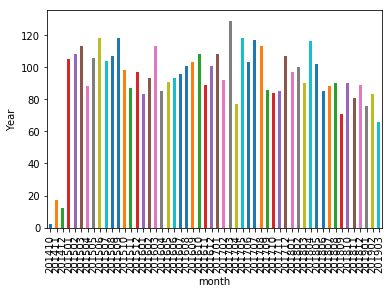

<Figure size 432x288 with 0 Axes>

In [45]:
# Create a bar chart based off of the group series from before
count_chart = count_yrmth.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("month")
count_chart.set_ylabel("Year")

plt.show()
plt.tight_layout()

In [47]:
# testing year chart plotting
year_group = sorted_df.groupby('Year')

# Count how many times each appears in the group
count_yr = year_group['Year'].count()

count_yr.head()

Year
2014      31
2015    1249
2016    1156
2017    1219
2018    1099
Name: Year, dtype: int64

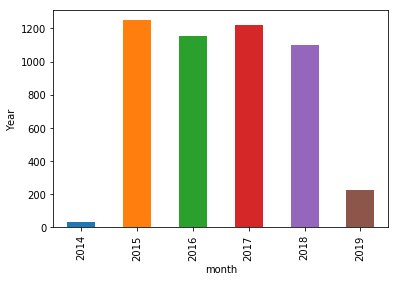

<Figure size 432x288 with 0 Axes>

In [48]:
# Create a bar chart based off of the group series from before
count_yrchart = count_yr.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_yrchart.set_xlabel("month")
count_yrchart.set_ylabel("Year")

plt.show()
plt.tight_layout()

In [15]:
#trying to get numbers by year and month for seperate charts
yearthenmonth_group = sorted_df.groupby(['Year', 'month'])

# Count how many times each appears in the group
count_yrthenmonth = yearthenmonth_group.count()

In [17]:
count_yrthenmonth

Issue Date  Issue time  RP State Plate  Make  Body Style  Color  \
Year month                                                                    
2014 10              2           2               2     2           2      2   
     11             17          17              17    17          17     17   
     12             12          12              12    12          12     12   
2015 01            105         105             105   105         105    105   
     02            108         108             108   108         108    108   
     03            113         113             113   113         113    113   
     04             88          88              88    88          88     88   
     05            106         106             106   106         106    106   
     06            118         118             118   118         118    118   
     07            104         104             104   104         104    104   
     08            107         107             107   107         107    107   
     09            118         118             118   118         118    118   
     10             98          98              98    98          98     98   
     11             87          87              87    87          87     87   
     12             97          97              97    97          97     97   
2016 01             83          83              83    83          83     83   
     02             93          93              93    93          93     93   
     03            113         113             113   113         113    113   
     04             85          85              85    85          85     85   
     05             91          91              91    91          91     91   
     06             93          93              93    93          93     93   
     07             96          96              96    96          96     96   
     08            101         101             101   101         101    101   
     09            103         103             103   103         103    103   
     10            108         108             108   108         108    108   
     11             89          89              89    89          89     89   
     12            101         101             101   101         101    101   
2017 01            108         108             108   108         108    108   
     02             92          92              92    92          92     92   
     03            129         129             129   129         129    129   
     04             77          77              77    77          77     77   
     05            118         118             118   118         118    118   
     06            103         103             103   103         103    103   
     07            117         117             117   117         117    117   
     08            113         113             113   113         113    113   
     09             86          86              86    86          86     86   
     10             84          84              84    84          84     84   
     11             85          85              85    85          85     85   
     12            107         107             107   107         107    107   
2018 01             97          97              97    97          97     97   
     02            100         100             100   100         100    100   
     03             90          90              90    90          90     90   
     04            116         116             116   116         116    116   
     05            102         102             102   102         102    102   
     06             85          85              85    85          85     85   
     07             88          88              88    88          88     88   
     08             90          90              90    90          90     90   
     09             71          71              71    71          71     71   
     10             90          90              90    90      

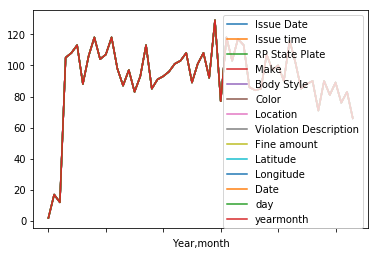

In [21]:
count_yrthenmonth.plot(label='years')

plt.show()

In [23]:
type(count_yrthenmonth)

pandas.core.frame.DataFrame

In [24]:
#Didn't need to do this 
#chart_data_df = pd.DataFrame(count_yrthenmonth)
#chart_data_df.head()

In [26]:
#drop all columns but one for plotting
chart_data_df = count_yrthenmonth.drop(columns = ["Issue time", "RP State Plate", "Make", "Body Style", "Color", "Location",
                               "Violation Description", "Fine amount", "Latitude", "Longitude", "Date", "day", "yearmonth"])
chart_data_df.head()

Issue Date
Year month            
2014 10              2
     11             17
     12             12
2015 01            105
     02            108

In [29]:
type(chart_data_df)

pandas.core.frame.DataFrame

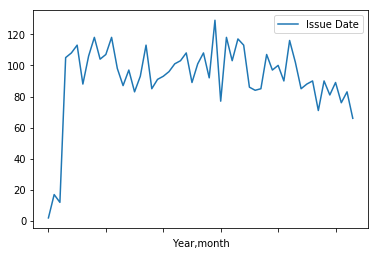

In [27]:
chart_data_df.plot(label='Issue Date')

plt.show()

In [32]:
chart_2015 = chart_data_df.loc["2015", "Issue Date"]
chart_2015

month
01    105
02    108
03    113
04     88
05    106
06    118
07    104
08    107
09    118
10     98
11     87
12     97
Name: Issue Date, dtype: int64

In [33]:
chart_2016 = chart_data_df.loc["2016", "Issue Date"]
chart_2017 = chart_data_df.loc["2017", "Issue Date"]
chart_2018 = chart_data_df.loc["2018", "Issue Date"]
chart_2019 = chart_data_df.loc["2019", "Issue Date"]
chart_2019

month
01    76
02    83
03    66
Name: Issue Date, dtype: int64

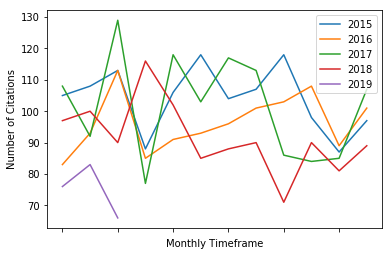

In [37]:
chart_2015.plot(label='2015')
chart_2016.plot(label='2016')
chart_2017.plot(label='2017')
chart_2018.plot(label='2018')
chart_2019.plot(label='2019')

plt.xlabel("Monthly Timeframe")
plt.ylabel("Number of Citations")

plt.legend()

plt.show()

In [2]:
#import pandas as pd
#import zipfile

#hwzip = zipfile.ZipFile("parking-citations.csv.zip", mode='r')
#hwdf = pd.read.csv(zf.open("parking-citations.csv"))
#hwdf.head()

import pandas as pd
import numpy as np
# Save path to data set in a variable
read_file = "parking-citations.csv"
# Use Pandas to read data
hwdf = pd.read_csv(read_file)
hwdf.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [3]:
#DataFrame created from original information
new_hwdf = hwdf.drop(columns = ["Ticket number", "Meter Id", "Marked Time", "Plate Expiry Date", "VIN", "Route",
                               "Agency", "Violation code"])
new_hwdf.head()

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude
0,2015-12-21T00:00:00,1251.0,CA,HOND,PA,GY,13147 WELBY WAY,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,2015-12-21T00:00:00,1435.0,CA,GMC,VN,WH,525 S MAIN ST,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,2015-12-21T00:00:00,2055.0,CA,NISS,PA,BK,200 WORLD WAY,WHITE CURB,58.0,6439997.9,1802686.4
3,2015-12-26T00:00:00,1515.0,CA,ACUR,PA,WH,100 WORLD WAY,17104h,NaN,6440041.1,1802686.2
4,2015-09-15T00:00:00,115.0,CA,CHEV,PA,BK,GEORGIA ST/OLYMPIC,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [4]:
new_hwdf.dtypes

Issue Date                object
Issue time               float64
RP State Plate            object
Make                      object
Body Style                object
Color                     object
Location                  object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtype: object

In [4]:
#renaming column for issue date
renamed_hwdf = new_hwdf.rename(columns={"Issue Date":"Original Issue Date"})
renamed_hwdf.head()

,Original Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Latitude,Longitude
0,2015-12-21T00:00:00,1251.0,CA,HOND,PA,GY,13147 WELBY WAY,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,2015-12-21T00:00:00,1435.0,CA,GMC,VN,WH,525 S MAIN ST,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,2015-12-21T00:00:00,2055.0,CA,NISS,PA,BK,200 WORLD WAY,WHITE CURB,58.0,6439997.9,1802686.4
3,2015-12-26T00:00:00,1515.0,CA,ACUR,PA,WH,100 WORLD WAY,17104h,NaN,6440041.1,1802686.2
4,2015-09-15T00:00:00,115.0,CA,CHEV,PA,BK,GEORGIA ST/OLYMPIC,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [6]:
#Original HW work -> string split function to remove time stamp from Date
updt_hwdf = renamed_hwdf["Original Issue Date"].str.split("T").str[0]
updt_hwdf.head()

0    2015-12-21
1    2015-12-21
2    2015-12-21
3    2015-12-26
4    2015-09-15
Name: Original Issue Date, dtype: object

In [12]:
#setting up dataframe new date column for re-insertion back into final dataframe
getting_there_hwdf = pd.DataFrame(updt_hwdf)
getting_there_hwdf.head()

,Original Issue Date
0,2015-12-21
1,2015-12-21
2,2015-12-21
3,2015-12-26
4,2015-09-15


In [13]:
almost_there_hwdf = getting_there_hwdf.rename(columns={"Original Issue Date":"Issue Date"})
almost_there_hwdf.head()

,Issue Date
0,2015-12-21
1,2015-12-21
2,2015-12-21
3,2015-12-26
4,2015-09-15


In [26]:
#trying to add a column and add a count ID (random ID) to use for future merge -> seems a bit much
#to go through to clean up data
sLength = len(renamed_hwdf['Issue time'])
almost_there_hwdf["Random ID"] = pd.Series([0])
almost_there_hwdf.head()

,Issue Date,Random ID
0,2015-12-21,0.0
1,2015-12-21,NaN
2,2015-12-21,NaN
3,2015-12-26,NaN
4,2015-09-15,NaN


In [21]:
#trying add function to get new Issue date into updated hwdf - basically get the clean date in the dataframe
alst_final_hwdf = renamed_hwdf.add(almost_there_hwdf, fill_value=0)
alst_final_hwdf

TypeError: can only concatenate str (not "float") to str

In [18]:
#attempting to use insert to jam new Issue Date 
#alm_final_hwdf = renamed_hwdf.insert(0, "Clean Issue Date", almost_there_hwdf)
#alm_final_hwdf.head()

ValueError: cannot insert Clean Issue Date, already exists

In [19]:
#using join to add edited Issue Date column back into final data frame
#final_hwdf = renamed_hwdf.join(almost_there_hwdf)
#final_hwdf.head()

ValueError: columns overlap but no suffix specified: Index(['Issue Date'], dtype='object')